In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas  version: 1.2.4
numpy   version: 1.20.1
seaborn version: 0.11.1


In [3]:
#url='https://github.com/prasertcbs/basic-dataset/raw/master/diabetes.csv'
url='C:\AppServ\www\ML\m_elderly_person_area1.csv'
df=pd.read_csv(url)
df.head()

weight  height  waistline  income_total  expend_avg  expend_health_year  \
0      55     150         70        3200.0      3200.0               150.0   
1      50     158         76        6000.0      8000.0               200.0   
2      44     154         68       14100.0      8000.0               500.0   
3      48     163         86        4800.0      6000.0                 0.0   
4      75     145         99       23200.0     10600.0                 0.0   

   work_week_hr sectio4_score  gender  
0             4        MEDIUM       2  
1             0          GOOD       1  
2             1      VERYGOOD       1  
3             8           LOW       1  
4             9      VERYGOOD       2

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   weight              1228 non-null   int64  
 1   height              1228 non-null   int64  
 2   waistline           1228 non-null   int64  
 3   income_total        1228 non-null   float64
 4   expend_avg          1228 non-null   float64
 5   expend_health_year  1228 non-null   float64
 6   work_week_hr        1228 non-null   int64  
 7   sectio4_score       1228 non-null   object 
 8   gender              1228 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 86.5+ KB


In [ ]:
sns.pairplot(df,
             kind='reg', 
             plot_kws={'scatter_kws': {'alpha': 0.4}, 
                       'line_kws': {'color': 'orange'}},
             diag_kws={'color': 'green', 'alpha':.2});

In [6]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import metrics

In [7]:
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 0.24.1


In [8]:
df.columns

Index(['weight', 'height', 'waistline', 'income_total', 'expend_avg',
       'expend_health_year', 'work_week_hr', 'sectio4_score', 'gender'],
      dtype='object')

In [9]:
 #model= DecisionTreeClassifier(random_state=7)
model= RandomForestClassifier(n_estimators=250, random_state=7)
# model= ExtraTreesClassifier(n_estimators=250, random_state=7)
#X=df[[ 'weight', 'height', 'waistline']]
#X=df[[ 'weight', 'height', 'waistline','income_total','expend_avg','expend_health_year','work_week_hr','gender']]		
X=df[[ 'weight', 'height', 'waistline','income_total','expend_avg','expend_health_year','work_week_hr','gender']]		
y=df['sectio4_score']
model.fit(X,y)

RandomForestClassifier(n_estimators=250, random_state=7)

In [10]:
model.feature_importances_

array([0.15530694, 0.13203777, 0.15746794, 0.18088481, 0.15565276,
       0.08646245, 0.10616815, 0.02601918])

In [11]:
fs=pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)
fs

gender                0.026019
expend_health_year    0.086462
work_week_hr          0.106168
height                0.132038
weight                0.155307
expend_avg            0.155653
waistline             0.157468
income_total          0.180885
dtype: float64

In [12]:
fs.sum()

1.0

<AxesSubplot:>

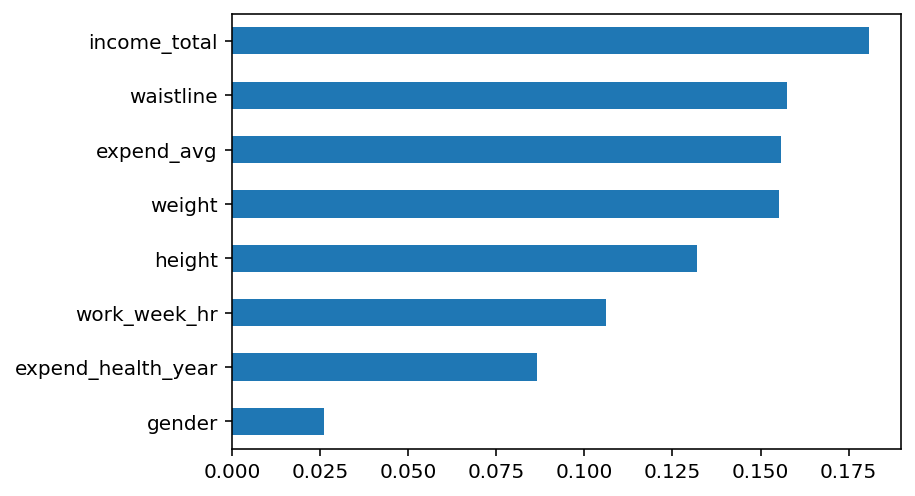

In [13]:
fs.plot(kind='barh')

In [14]:
fs[fs > .1]

work_week_hr    0.106168
height          0.132038
weight          0.155307
expend_avg      0.155653
waistline       0.157468
income_total    0.180885
dtype: float64

In [15]:
fs.nlargest(4) #.index

income_total    0.180885
waistline       0.157468
expend_avg      0.155653
weight          0.155307
dtype: float64

In [16]:
fs[fs > .1].index

Index(['work_week_hr', 'height', 'weight', 'expend_avg', 'waistline',
       'income_total'],
      dtype='object')

In [17]:
X=df[fs[fs > .1].index]
X.head()

work_week_hr  height  weight  expend_avg  waistline  income_total
0             4     150      55      3200.0         70        3200.0
1             0     158      50      8000.0         76        6000.0
2             1     154      44      8000.0         68       14100.0
3             8     163      48      6000.0         86        4800.0
4             9     145      75     10600.0         99       23200.0

In [18]:
X=df[['weight', 'height', 'waistline','income_total','expend_avg','expend_health_year','work_week_hr','gender']]
#X=df[['income_total','weight','expend_avg','height']]
#X=df[['height','waistline']]
# X=df[fs[fs > .1].index]
y=df['sectio4_score']

In [19]:
# use stratify to split train/test
test_size=.2
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                   # stratify=y,
                                                    random_state=7)

In [20]:
algo=[
    [KNeighborsClassifier(n_neighbors=5), 'KNeighborsClassifier'], 
    #[LogisticRegression(solver='lbfgs'), 'LogisticRegression'], 
    #[Perceptron(), 'Perceptron'],
    #[DecisionTreeClassifier(min_samples_split=10), 'DecisionTreeClassifier'],
    #[GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    #[RandomForestClassifier(), 'RandomForestClassifier'],
    #[BaggingClassifier(), 'BaggingClassifier'],
    #[AdaBoostClassifier(), 'AdaBoostClassifier'],
    #[GaussianNB(), 'GaussianNB'],
    #[MLPClassifier(), 'MLPClassifier'],
    [SVC(kernel='linear'), 'SVC_linear']
    #[GaussianProcessClassifier(), 'GaussianProcessClassifier']
]
model_scores=[]
for a in algo:
    model = a[0]
    model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    model_scores.append([score, a[1]])
    y_pred=model.predict(X_test)
    print(f'{a[1]:20} score: {score:.04f}')
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('-' * 100)

print(model_scores)
print(f'best score = {max(model_scores)}')    

KNeighborsClassifier score: 0.3780
[[22  5 15 34]
 [ 2  2  3  7]
 [ 7  2  5 25]
 [29  5 19 64]]
              precision    recall  f1-score   support

        GOOD       0.37      0.29      0.32        76
         LOW       0.14      0.14      0.14        14
      MEDIUM       0.12      0.13      0.12        39
    VERYGOOD       0.49      0.55      0.52       117

    accuracy                           0.38       246
   macro avg       0.28      0.28      0.28       246
weighted avg       0.37      0.38      0.37       246

----------------------------------------------------------------------------------------------------


In [53]:
model_scores

[[0.7886178861788617, 'KNeighborsClassifier'],
 [0.8130081300813008, 'LogisticRegression'],
 [0.5284552845528455, 'Perceptron'],
 [0.7642276422764228, 'DecisionTreeClassifier'],
 [0.7926829268292683, 'GradientBoostingClassifier'],
 [0.8008130081300813, 'RandomForestClassifier'],
 [0.7764227642276422, 'BaggingClassifier'],
 [0.7967479674796748, 'AdaBoostClassifier'],
 [0.7845528455284553, 'GaussianNB'],
 [0.6707317073170732, 'MLPClassifier'],
 [0.8089430894308943, 'SVC_linear']]

In [54]:
dscore=pd.DataFrame(model_scores, columns=['score', 'classifier'])
dscore.sort_values('score', ascending=False)

score                  classifier
1   0.813008          LogisticRegression
10  0.808943                  SVC_linear
5   0.800813      RandomForestClassifier
7   0.796748          AdaBoostClassifier
4   0.792683  GradientBoostingClassifier
0   0.788618        KNeighborsClassifier
8   0.784553                  GaussianNB
6   0.776423           BaggingClassifier
3   0.764228      DecisionTreeClassifier
9   0.670732               MLPClassifier
2   0.528455                  Perceptron

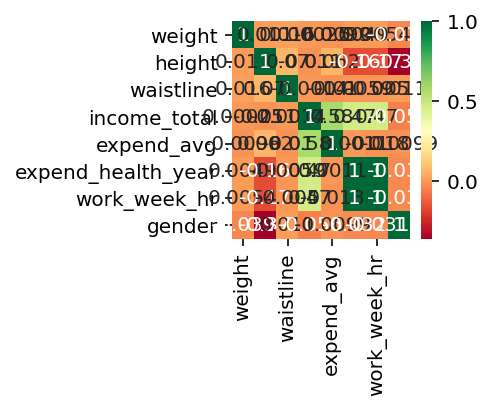

In [55]:

#X=df[['height','weight','waistline']]
X=df[['height','waistline']]
# X=df[fs[fs > .1].index]
y=df['gender']#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
